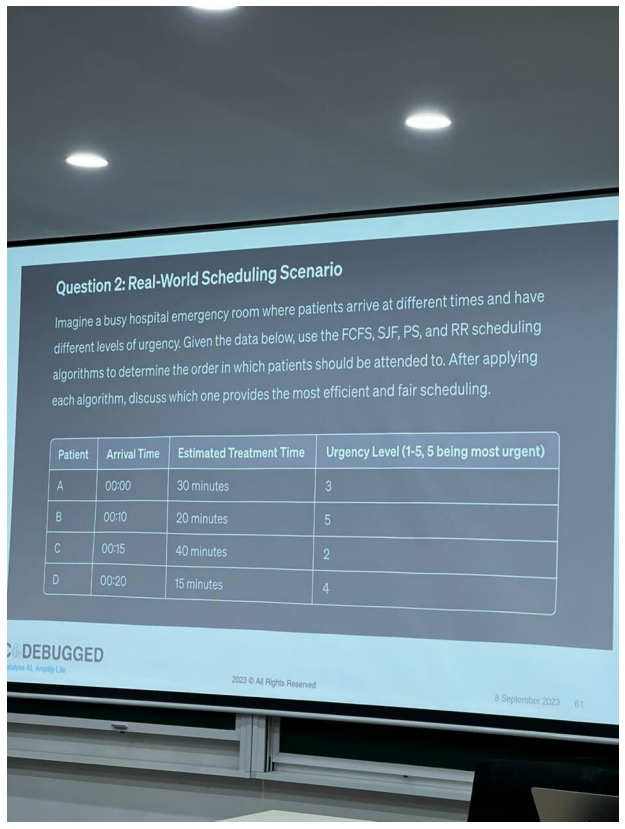

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = 'Image_2.jpg'  
img = mpimg.imread(image_path)
plt.figure(figsize=(15,15))  
plt.imshow(img)
plt.axis('off')
plt.show()

In [2]:
from datetime import datetime

def time_to_minutes(time_str):
    # Convert HH:MM format time to minutes
    time_format = "%H:%M"
    time_obj = datetime.strptime(time_str.strip(), time_format)
    return time_obj.hour * 60 + time_obj.minute

# FCFS SCHEDULING

In [3]:


def first_come_first_serve(processes):
    num = len(processes)
    tot_turnaroundtime = 0
    tot_waitingtime = 0

    current_time = 0
    process_order = []

    for i in range(num):
        ready_processes = [p for p in processes if p[1] <= current_time]

        if not ready_processes:
            current_time += 1
            continue

        current_process = min(ready_processes, key=lambda x: x[1])
        process_order.append(current_process[0])

        process_id, arrival_time, burst_time, priority = current_process
        s_time = max(current_time, arrival_time)
        c_time = s_time + burst_time
        ta_time = c_time - arrival_time
        wait_time = ta_time - burst_time

        tot_turnaroundtime += ta_time
        tot_waitingtime += wait_time

        current_time = c_time
        processes.remove(current_process)

    avg_waiting_time = tot_waitingtime / num
    avg_turnaround_time = tot_turnaroundtime / num

    return process_order, avg_waiting_time, avg_turnaround_time

# SJF SCHEDULING

In [4]:


def shortest_job_first(processes):
    num = len(processes)
    tot_turnaroundtime = 0
    tot_waitingtime = 0

    current_time = 0
    process_order = []

    while processes:
        ready_processes = [p for p in processes if p[1] <= current_time]

        if not ready_processes:
            current_time += 1
            continue

        shortest_process = min(ready_processes, key=lambda x: x[2])
        process_order.append(shortest_process[0])

        process_id, arrival_time, burst_time, priority = shortest_process
        s_time = current_time
        c_time = s_time + burst_time
        ta_time = c_time - arrival_time
        wait_time = ta_time - burst_time

        tot_turnaroundtime += ta_time
        tot_waitingtime += wait_time

        current_time = c_time
        processes.remove(shortest_process)

    avg_waiting_time = tot_waitingtime / num
    avg_turnaround_time = tot_turnaroundtime / num

    return process_order, avg_waiting_time, avg_turnaround_time

# PRIORITY SCHEDULING

In [5]:
def priority_scheduling(processes):
    num = len(processes)
    tot_turnaroundtime = 0
    tot_waitingtime = 0

    current_time = 0
    process_order = []

    while processes:
        ready_processes = [p for p in processes if p[1] <= current_time]

        if not ready_processes:
            current_time += 1
            continue

        highest_priority_process = min(ready_processes, key=lambda x: x[3])
        process_order.append(highest_priority_process[0])

        process_id, arrival_time, burst_time, priority = highest_priority_process
        s_time = current_time
        c_time = s_time + burst_time
        ta_time = c_time - arrival_time
        wait_time = ta_time - burst_time

        tot_turnaroundtime += ta_time
        tot_waitingtime += wait_time

        current_time = c_time
        processes.remove(highest_priority_process)

    avg_waiting_time = tot_waitingtime / num
    avg_turnaround_time = tot_turnaroundtime / num

    return process_order, avg_waiting_time, avg_turnaround_time




# MAIN COMPARISION

In [6]:

if __name__ == "__main__":
    # Input processes: [["P1", "00:00", 30, 3], ["P2", "00:10", 20, 1], ["P3", "00:15", 40, 4], ["P4", "00:20", 15, 2]]
    processes = [["P1", "00:00", 30, 3], ["P2", "00:10", 20, 1], ["P3", "00:15", 40, 4], ["P4", "00:20", 15, 2]]

    # Convert arrival times to minutes
    for process in processes:
        process[1] = time_to_minutes(process[1])

    algorithms = ["FCFS", "SJF", "Priority"]

    results = {}  # Store results for each algorithm

    for algorithm in algorithms:
        if algorithm == "FCFS":
            process_order, avg_waiting_time, avg_turnaround_time = first_come_first_serve(processes.copy())
        elif algorithm == "SJF":
            process_order, avg_waiting_time, avg_turnaround_time = shortest_job_first(processes.copy())
        elif algorithm == "Priority":
            process_order, avg_waiting_time, avg_turnaround_time = priority_scheduling(processes.copy())
  

        results[algorithm] = (avg_waiting_time, avg_turnaround_time, process_order)

    # Print results for all algorithms
    for algorithm, (avg_waiting_time, avg_turnaround_time, process_order) in results.items():
        print(f"{algorithm}:")
        print(f"Process Order: {' -> '.join(process_order)}")
        print(f"Average Waiting Time: {avg_waiting_time}")
        print(f"Average Turnaround Time: {avg_turnaround_time}")
        print()


FCFS:
Process Order: P1 -> P2 -> P3 -> P4
Average Waiting Time: 31.25
Average Turnaround Time: 57.5

SJF:
Process Order: P1 -> P4 -> P2 -> P3
Average Waiting Time: 23.75
Average Turnaround Time: 50.0

Priority:
Process Order: P1 -> P2 -> P4 -> P3
Average Waiting Time: 25.0
Average Turnaround Time: 51.25

